100%|██████████| 24/24 [00:25<00:00,  1.04s/it]


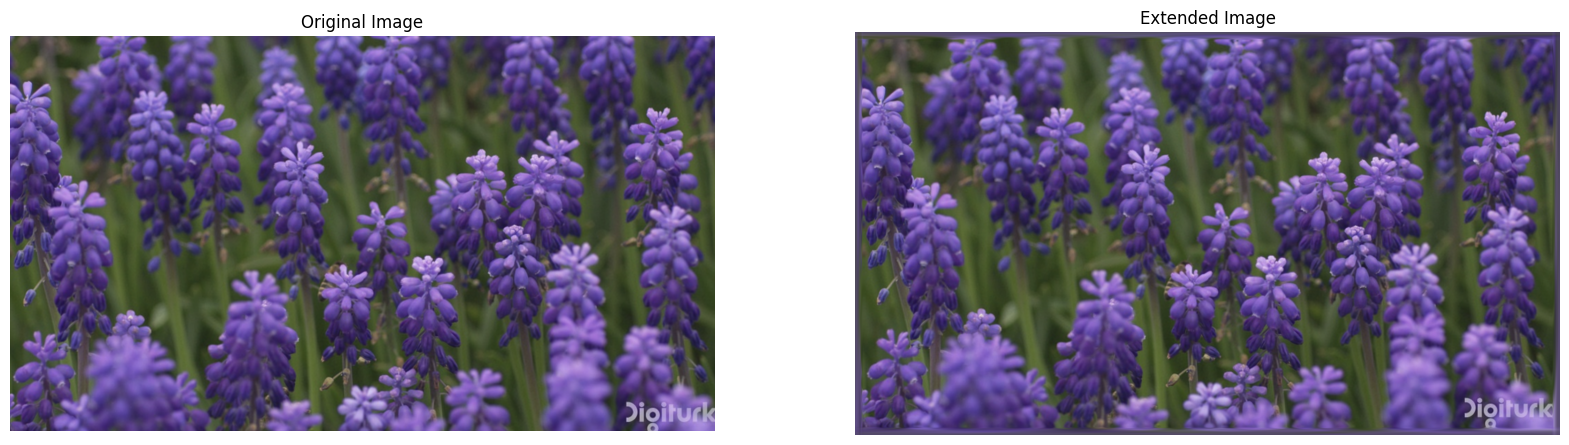

扩展后的图像已保存为 'extended_test.png'


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
def extend_image(image, border_size=25):
    mean_color = np.mean(image, axis=(0, 1)).astype(np.uint8)
    H, W, C = image.shape
    block_size=2
    extended_image = np.zeros((H + 2 * border_size, W + 2 * border_size, C), dtype=np.uint8)
    extended_image[border_size:H + border_size, border_size:W + border_size] = image
    #上边界
    extended_image[border_size-1,:,:]=extended_image[border_size,:,:]
    for j in tqdm(range(1,border_size)):
        block_size=j*j+1
        for i in range(W):
            if(i-block_size//2>=0 and i+block_size//2<=W-1):
                block_image=np.zeros((block_size, block_size, C), dtype=np.uint8)
                block_image=extended_image[border_size-j:border_size+block_size-1-j,border_size+i-block_size//2:border_size+i+block_size//2,:]
            elif(i-block_size//2<0):
                block_image=np.zeros((block_size, i+block_size//2+1, C), dtype=np.uint8)
                block_image=extended_image[border_size-j:border_size+block_size-1-j,border_size:border_size+i+block_size//2,:]
            elif(i+block_size//2>W-1):
                block_image=np.zeros((block_size, W-1-i+block_size//2+1, C), dtype=np.uint8)
                block_image=extended_image[border_size-j:border_size+block_size-1-j,border_size+i-block_size//2:border_size+W-1,:]
            extended_image[border_size-1-j,border_size+i,:]=np.mean(block_image, axis=(0, 1)).astype(np.uint8)
    #下边界
    extended_image[border_size+H,:,:]=extended_image[border_size+H-1,:,:]
    for j in tqdm(range(1,border_size)):
        block_size=j*j+1
        for i in range(W):
            if(i-block_size//2>=0 and i+block_size//2<=W-1):
                block_image=np.zeros((block_size, block_size, C), dtype=np.uint8)
                block_image=extended_image[border_size+H-block_size+j:border_size+H-1+j,border_size+i-block_size//2:border_size+i+block_size//2,:]
            elif(i-block_size//2<0):
                block_image=np.zeros((block_size, i+block_size//2+1, C), dtype=np.uint8)
                block_image=extended_image[border_size+H-block_size+j:border_size+H-1+j,border_size:border_size+i+block_size//2,:]
            elif(i+block_size//2>W-1):
                block_image=np.zeros((block_size, W-1-i+block_size//2+1, C), dtype=np.uint8)
                block_image=extended_image[border_size+H-block_size+j:border_size+H-1+j,border_size+i-block_size//2:border_size+W-1,:]
            extended_image[H+border_size+j,border_size+i,:]=np.mean(block_image, axis=(0, 1)).astype(np.uint8)
    #左边界
    extended_image[:,border_size-1,:]=extended_image[:,border_size,:]
    for j in tqdm(range(1,border_size)):
        block_size=j*j+1
        for i in range(H):
            if(i-block_size//2>=0 and i+block_size//2<=H-1):
                block_image=np.zeros((block_size, block_size, C), dtype=np.uint8)
                block_image=extended_image[border_size+i-block_size//2:border_size+i+block_size//2,border_size-j:border_size+block_size-1-j,:]
            elif(i-block_size//2<0):
                block_image=np.zeros(( i+block_size//2+1,block_size, C), dtype=np.uint8)
                block_image=extended_image[border_size:border_size+i+block_size//2,border_size-j:border_size+block_size-1-j,:]
            elif(i+block_size//2>H-1):
                block_image=np.zeros(( H-1-i+block_size//2+1,block_size, C), dtype=np.uint8)
                block_image=extended_image[border_size+i-block_size//2:border_size+H-1,border_size-j:border_size+block_size-1-j,:]
            extended_image[border_size+i,border_size-1-j,:]=np.mean(block_image, axis=(0, 1)).astype(np.uint8)
    #右边界
    extended_image[:,border_size+W,:]=extended_image[:,border_size+W-1,:]
    for j in tqdm(range(1,border_size)):
        block_size=j*j+1
        for i in range(H):
            if(i-block_size//2>=0 and i+block_size//2<=H-1):
                block_image=np.zeros((block_size, block_size, C), dtype=np.uint8)
                block_image=extended_image[border_size+i-block_size//2:border_size+i+block_size//2,border_size+W-block_size+j:border_size+W-1+j,:]
            elif(i-block_size//2<0):
                block_image=np.zeros((block_size, i+block_size//2+1, C), dtype=np.uint8)
                block_image=extended_image[border_size:border_size+i+block_size//2,border_size+W-block_size+j:border_size+W-1+j,:]
            elif(i+block_size//2>W-1):
                block_image=np.zeros((block_size, W-1-i+block_size//2+1, C), dtype=np.uint8)
                block_image=extended_image[border_size+i-block_size//2:border_size+H-1,border_size+H-block_size+j:border_size+W-1+j,:]
            extended_image[border_size+i,W+border_size+j,:]=np.mean(block_image, axis=(0, 1)).astype(np.uint8)


    for i in range(border_size):
        for j in range(border_size):
            x = border_size-j-1
            y = border_size-i-1
            if x==0 and y==0:
                alpha_x=0.5
                alpha_y=0.5
            else:
                alpha_x=x/(x+y)
                alpha_y=y/(x+y)
            extended_image[i, j] = (1-alpha_x) * extended_image[i, border_size] + (1-alpha_y) * extended_image[border_size, j]
            extended_image[i,  W + 2*border_size -1-j] = (1-alpha_x) * extended_image[i,  W +border_size-1] + (1-alpha_y) * extended_image[border_size, W + 2*border_size -1-j]
            extended_image[H + 2*border_size-1-i,  j] = (1-alpha_x) * extended_image[H + 2*border_size -1-i,  border_size] + (1-alpha_y) * extended_image[H+border_size-1, j]
            extended_image[H + 2*border_size-1-i,  W + 2*border_size -1-j] = (1-alpha_x) * extended_image[H + 2*border_size -1-i,  W+border_size-1] + (1-alpha_y) * extended_image[H+border_size-1, W + 2*border_size -1-j]
    return extended_image

# 读取图片
image = cv2.imread('test.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 调用extend_image函数进行扩展
extended_image = extend_image(image_rgb)

# 使用matplotlib显示原始图像和扩展图像
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(extended_image)
plt.title('Extended Image')
plt.axis('off')

plt.show()

# 保存扩展后的图像
extended_image_bgr = cv2.cvtColor(extended_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('extended_test.png', extended_image_bgr)
print("扩展后的图像已保存为 'extended_test.png'")

In [2]:
def train_iter(iter,removal_rate,densification_interval,iter_threshold_remove,max_num_points,num_points):
    if (iter) % (densification_interval) == 0 and iter > 0 :
        num_points = density_control(iter,removal_rate,densification_interval,iter_threshold_remove,max_num_points,num_points)
    return num_points
def density_control(iter,removal_rate,densification_interval,iter_threshold_remove,max_num_points,num_points):
    if iter > iter_threshold_remove:
        return num_points
    removal_rate_per_step = removal_rate/int(iter_threshold_remove/densification_interval)
    if iter < iter_threshold_remove:
        remove_count = int(removal_rate_per_step * max_num_points)
        num_points=num_points-remove_count
    elif iter == iter_threshold_remove:
        remove_count = num_points-int(max_num_points * (1-removal_rate))
        if remove_count>0:
            num_points=num_points-remove_count
    return num_points
def train():
    removal_rate=0.1
    densification_interval=100
    num_points=70000
    iter_threshold_remove = 6000
    max_num_points=70000     
    for iter in range(1, 10001):
       num_points=train_iter(iter,removal_rate,densification_interval,iter_threshold_remove,max_num_points,num_points)
    print(f"final number: {num_points}")
        
train()


final number: 63000
